In [13]:
#12/5/24 Creation of RF models for endocrine toxicity prediction using the new datasets
#Differs from the other model creation scripts due to nature of the Endo Redux datasets
#Aims to loop through files in a folder and create a model for each of them
#Will implement K fold validation

#Is a prototype for a mass RF creation script for multiple datasets at a time

import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
#Data import
datasets = []
index = []
#directory = '/Users/james/Documents/Honours/Data/structdata/endocrine_redux/morganfp/'
directory = '/Users/james/Documents/Honours/Data/rawdata/rawendodata/Endodata/processedendodata/'
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)
        index.append(file)

In [17]:
loops = 0
for df in datasets:
    print(len(df.index))
    print(df.isnull().values.any())
    print(index[loops])
    loops = loops + 1

6629
False
NR-AR-LBD.csv
5712
False
SR-ARE.csv
6410
False
NR-AhR.csv
6636
False
SR-p53.csv
6068
False
NR-ER.csv
6338
False
SR-HSE.csv
5700
False
SR-MMP.csv
6931
False
SR-ATAD5.csv
6322
False
NR-PPAR-gamma.csv
6820
False
NR-ER-LBD.csv
5707
False
NR-aromatase.csv
7118
False
NR-AR.csv


In [3]:
#function to calculate various metrics, outputs a list of various metrics with a consistent index
def metriccalc(preds, ytrain):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0
    
    #loop through each item in the predictions, logging positives, negatives and tn/tp/fn/tp
    iterations = 0
    for value in preds:
        testscore = ytrain[iterations]
        if value == 1:
            if testscore != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if testscore != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        iterations = iterations + 1
    if tpcount == 0:
        return [0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    #calculate a wide swathe of metrics
    netfn = fncount / (fncount + tncount)
    nettn = tncount / (fncount + tncount)
    netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    posacc = tpcount / testpos
    negacc = tncount / testneg
    netfp = fpcount / (fpcount + tpcount)
    nettp = tpcount / (tpcount + fpcount)

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)



    f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)


    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount

    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return 0
    mcc = ((tp * tn) - (fp * fn)) / temp



    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
    if temp == 0:
        return 0
    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp
    
    metriclist = [testpos, testneg, fn, tn, tp, fp, netacc, posacc, negacc, fpr, tpr, f1, mcc, kapp]
    
    return metriclist

optimal paramers at y= 0.3095205926118027 x= 27


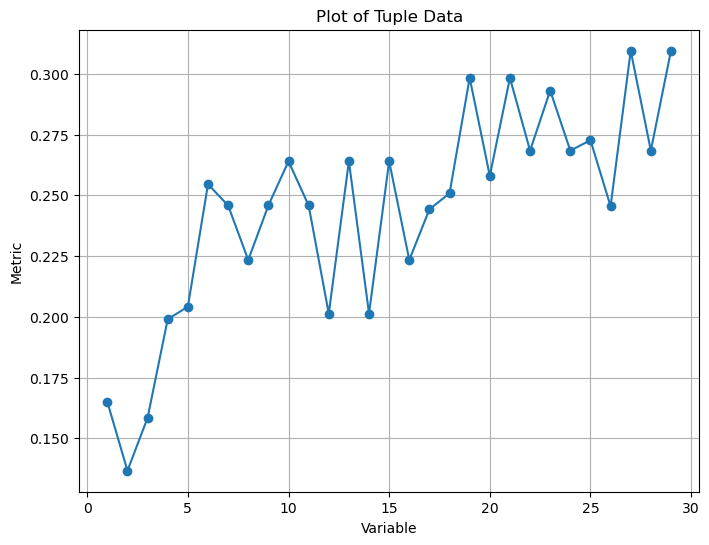

validation metrics of:
positives in data 79
negatives in data 1249 

fn count = 70
tn count = 1248
tp count = 9
fp count = 1 

net accuracy = 0.9465361445783133
positive accuracy = 0.11392405063291139
negative accuracy = 0.9991993594875901 

fpr = 0.0008006405124099279
tpr = 0.11392405063291139 

f1 score = 0.20224719101123595
mcc = 0.3095205926118027
cohen Kappa = 0.19143827393407198
optimal paramers at y= 0.5165553629820645 x= 29


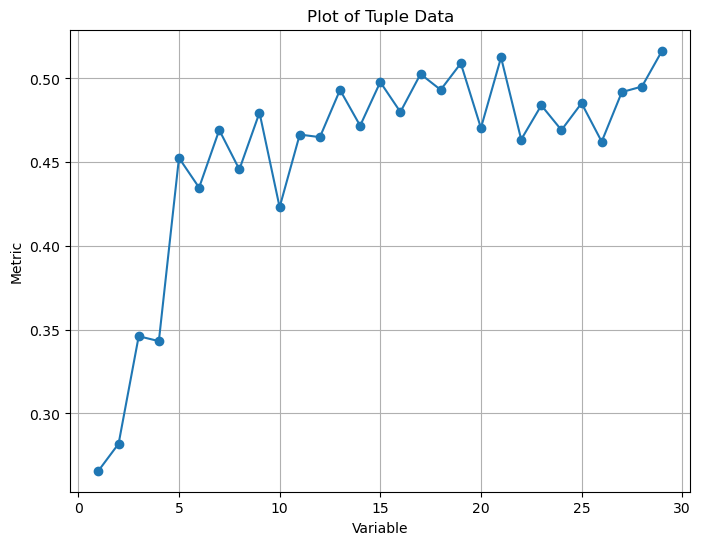

validation metrics of:
positives in data 142
negatives in data 1140 

fn count = 91
tn count = 1130
tp count = 51
fp count = 10 

net accuracy = 0.9212168486739469
positive accuracy = 0.3591549295774648
negative accuracy = 0.9912280701754386 

fpr = 0.008771929824561403
tpr = 0.3591549295774648 

f1 score = 0.5024630541871922
mcc = 0.5165553629820645
cohen Kappa = 0.46698117091082736
optimal paramers at y= 0.5648475669225563 x= 27


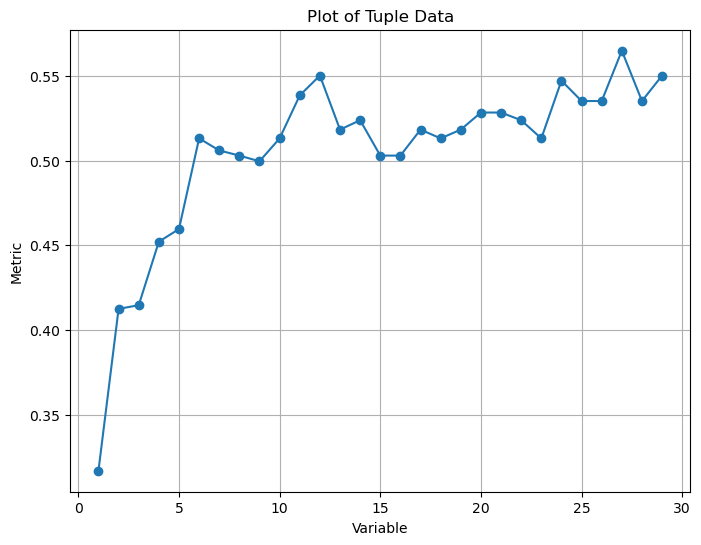

validation metrics of:
positives in data 59
negatives in data 1305 

fn count = 37
tn count = 1301
tp count = 22
fp count = 4 

net accuracy = 0.9699413489736071
positive accuracy = 0.3728813559322034
negative accuracy = 0.9969348659003832 

fpr = 0.0030651340996168583
tpr = 0.3728813559322034 

f1 score = 0.5176470588235295
mcc = 0.5501770728070029
cohen Kappa = 0.5045361117017506
optimal paramers at y= 0.2282212463035218 x= 20


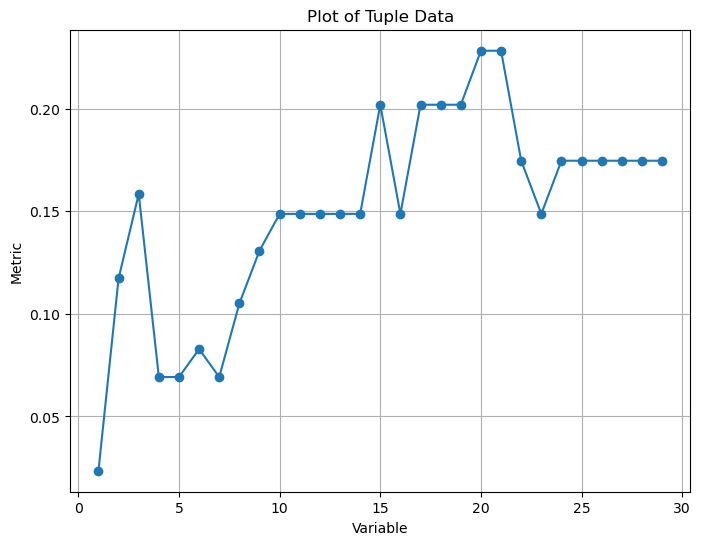

validation metrics of:
positives in data 41
negatives in data 1224 

fn count = 39
tn count = 1223
tp count = 2
fp count = 1 

net accuracy = 0.9683794466403162
positive accuracy = 0.04878048780487805
negative accuracy = 0.9991830065359477 

fpr = 0.0008169934640522876
tpr = 0.04878048780487805 

f1 score = 0.09090909090909091
mcc = 0.17462368480194998
cohen Kappa = 0.08687335330421915
optimal paramers at y= 0.33774709975368006 x= 25


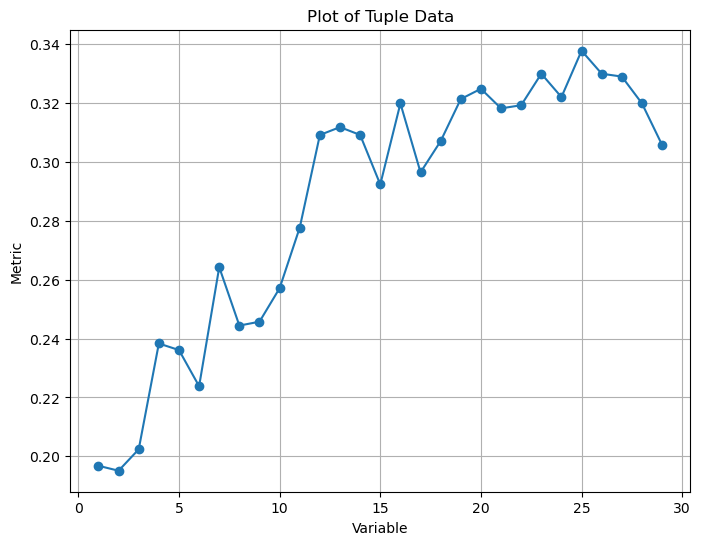

validation metrics of:
positives in data 155
negatives in data 1059 

fn count = 124
tn count = 1040
tp count = 31
fp count = 19 

net accuracy = 0.8822075782537068
positive accuracy = 0.2
negative accuracy = 0.9820585457979226 

fpr = 0.01794145420207743
tpr = 0.2 

f1 score = 0.3024390243902439
mcc = 0.30574784611821854
cohen Kappa = 0.2561083258345117
optimal paramers at y= 0.3068250036930712 x= 11


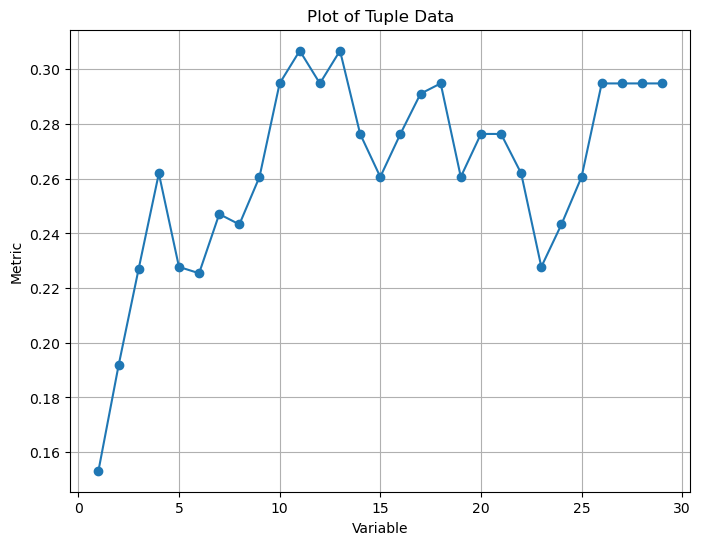

validation metrics of:
positives in data 49
negatives in data 1338 

fn count = 43
tn count = 1336
tp count = 6
fp count = 2 

net accuracy = 0.9675558759913482
positive accuracy = 0.12244897959183673
negative accuracy = 0.9985052316890882 

fpr = 0.0014947683109118087
tpr = 0.12244897959183673 

f1 score = 0.21052631578947367
mcc = 0.2948627855713197
cohen Kappa = 0.2026189715745768
optimal paramers at y= 0.3618455234445867 x= 16


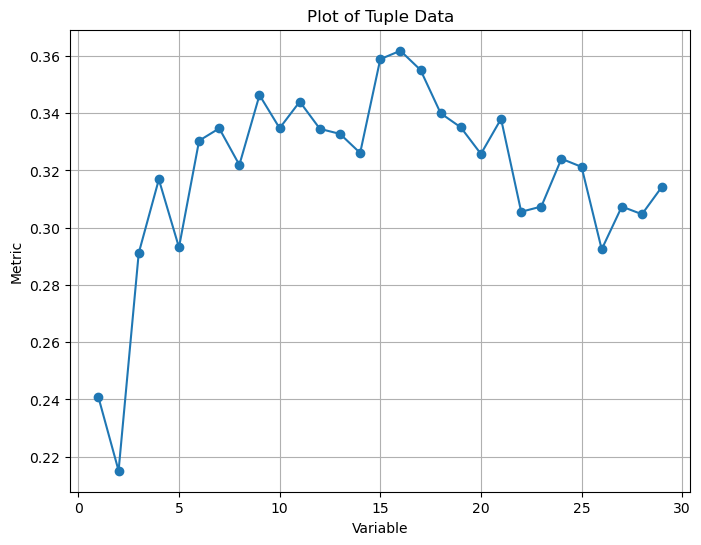

validation metrics of:
positives in data 174
negatives in data 969 

fn count = 138
tn count = 950
tp count = 36
fp count = 19 

net accuracy = 0.8626421697287839
positive accuracy = 0.20689655172413793
negative accuracy = 0.9803921568627451 

fpr = 0.0196078431372549
tpr = 0.20689655172413793 

f1 score = 0.314410480349345
mcc = 0.31437812202117055
cohen Kappa = 0.2603222495641099
optimal paramers at y= 0.698931861576246 x= 12


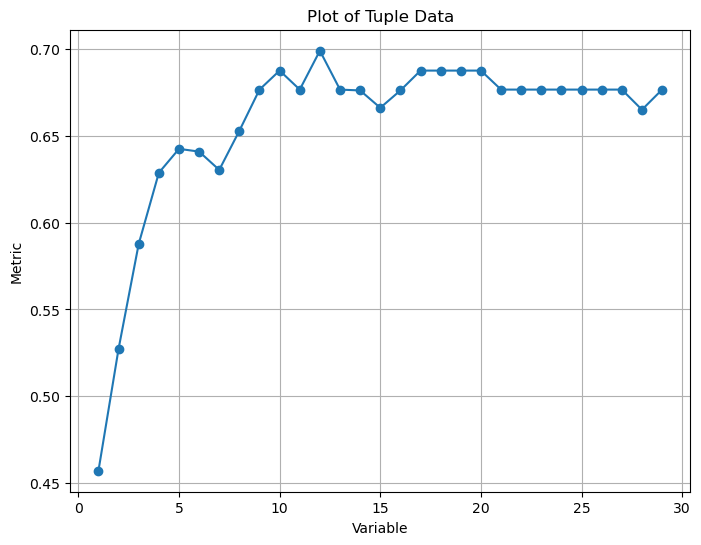

validation metrics of:
positives in data 64
negatives in data 1360 

fn count = 32
tn count = 1358
tp count = 32
fp count = 2 

net accuracy = 0.976123595505618
positive accuracy = 0.5
negative accuracy = 0.9985294117647059 

fpr = 0.0014705882352941176
tpr = 0.5 

f1 score = 0.6530612244897959
mcc = 0.6765554050859063
cohen Kappa = 0.6418934911242603
optimal paramers at y= 0.3506106828252322 x= 3


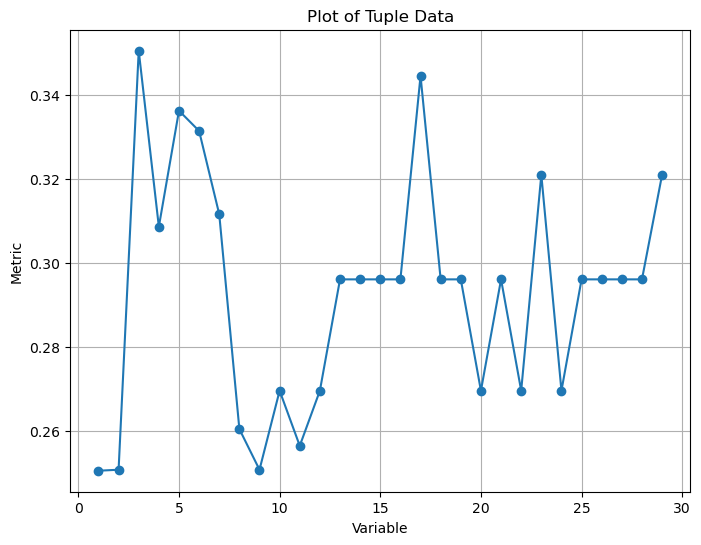

validation metrics of:
positives in data 56
negatives in data 1212 

fn count = 47
tn count = 1208
tp count = 9
fp count = 4 

net accuracy = 0.9597791798107256
positive accuracy = 0.16071428571428573
negative accuracy = 0.9966996699669967 

fpr = 0.0033003300330033004
tpr = 0.16071428571428573 

f1 score = 0.2608695652173913
mcc = 0.32106651709125367
cohen Kappa = 0.24836115114603188
optimal paramers at y= 0.4806856102163578 x= 19


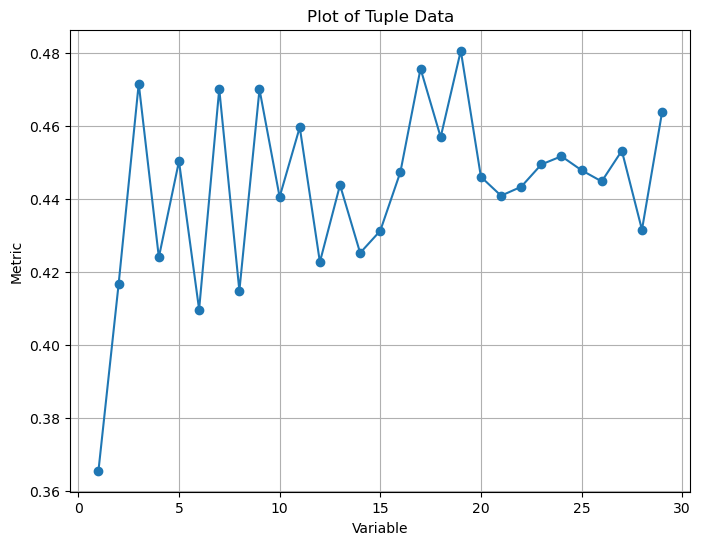

validation metrics of:
positives in data 176
negatives in data 964 

fn count = 111
tn count = 940
tp count = 65
fp count = 24 

net accuracy = 0.881578947368421
positive accuracy = 0.3693181818181818
negative accuracy = 0.975103734439834 

fpr = 0.024896265560165973
tpr = 0.3693181818181818 

f1 score = 0.49056603773584906
mcc = 0.46386250417594016
cohen Kappa = 0.43162513110661366
optimal paramers at y= 0.3646726059565603 x= 14


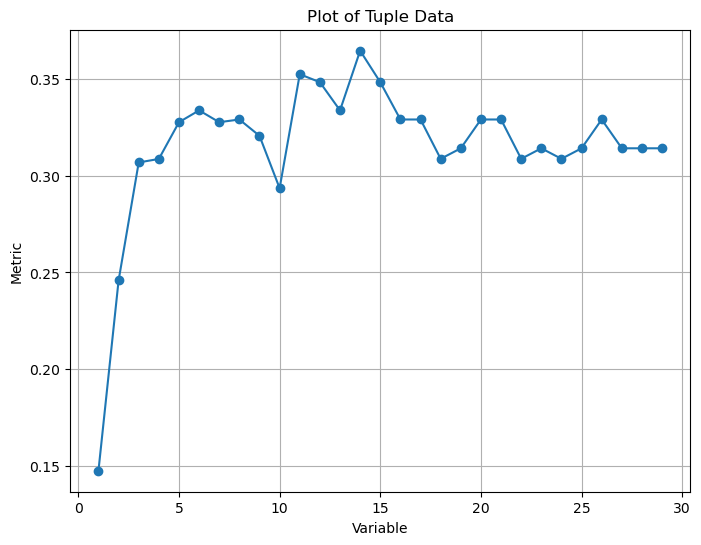

validation metrics of:
positives in data 71
negatives in data 1071 

fn count = 61
tn count = 1068
tp count = 10
fp count = 3 

net accuracy = 0.9439579684763573
positive accuracy = 0.14084507042253522
negative accuracy = 0.9971988795518207 

fpr = 0.0028011204481792717
tpr = 0.14084507042253522 

f1 score = 0.23809523809523808
mcc = 0.31421190829452067
cohen Kappa = 0.22314576645904635
optimal paramers at y= 0.6647436680073296 x= 24


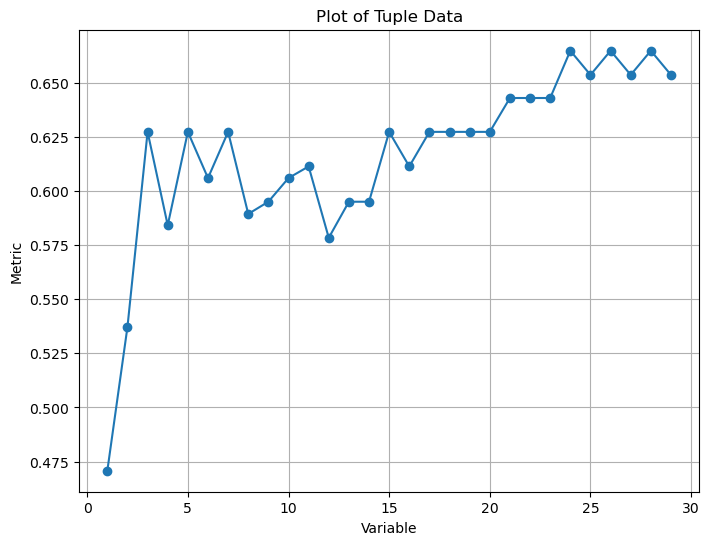

validation metrics of:
positives in data 48
negatives in data 1278 

fn count = 22
tn count = 1272
tp count = 26
fp count = 6 

net accuracy = 0.9788838612368024
positive accuracy = 0.5416666666666666
negative accuracy = 0.9953051643192489 

fpr = 0.004694835680751174
tpr = 0.5416666666666666 

f1 score = 0.65
mcc = 0.6535749854517764
cohen Kappa = 0.6395619757688723


In [4]:
#Metric curve creation (Recycled from autoencoder doc)


crite = ['gini', 'entropy', 'log_loss']
mtry = range(1, 30)
minsampleaf = range(1, 10)
maxfeat = ['sqrt', 'log2', None]
for targetdata in datasets:
    metriclist = []
    varlist = [] 
    trainset, testset = train_test_split(targetdata, test_size=0.2, random_state=81)
    #Converts Toxicity Values to a list
    temp = trainset['Toxicity_Values']#.to_list
    ytrain = []
    for val in temp:
        ytrain.append(val)
    ytest = []
    temp = testset['Toxicity_Values']#.to_list
    for val in temp:
        ytest.append(val)
    #Converts encoded drug target values to an array
    xtrain = trainset.iloc[:, 2:]
    xtest = testset.iloc[:, 2:]
    for mtry in range(1, 30):
        rf = RandomForestClassifier(n_estimators=mtry, criterion=crite[1], max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=81, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

        model= rf.fit(xtrain, ytrain)
        preds = model.predict(xtest)

        metriclist.append(metriccalc(preds, ytest)[12])
        varlist.append(mtry)

    import matplotlib.pyplot as plt
    y_values = metriclist
    x_values = varlist

    max_y = max(y_values)
    max_x = x_values[y_values.index(max_y)]

    print('optimal paramers at y=', max_y, 'x=', max_x)

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='-')

    # Add titles and labels
    plt.title('Plot of Tuple Data')
    plt.ylabel('Metric')
    plt.xlabel('Variable')

    # Display the plot
    plt.grid(True)
    plt.show()

    results = metriccalc(preds, ytest)
    print('validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])